In [44]:
import numpy as np
import pandas as pd

In [45]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [46]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4873,ham,Wat happened to the cruise thing,NaN,NaN,NaN
173,ham,"Bloody hell, cant believe you forgot my surnam...",NaN,NaN,NaN
652,ham,"Wait, do you know if wesleys in town? I bet sh...",NaN,NaN,NaN
5475,ham,Dhoni have luck to win some big title.so we wi...,NaN,NaN,NaN
1957,ham,Take something for pain. If it moves however t...,NaN,NaN,NaN


In [47]:
df.shape

(5572, 5)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [49]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [50]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1654,ham,"Wishing you and your family Merry \X\"" mas and..."
1615,ham,Mm i had my food da from out
2844,ham,Will be out of class in a few hours. Sorry
4272,ham,Kind of. Just missed train cos of asthma attac...
5223,ham,If I die I want u to have all my stuffs.


In [51]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [52]:
df = df.drop_duplicates(keep='first')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [54]:
import nltk
print(nltk.__version__)
nltk.download('punkt')
nltk.download('stopwords')

3.8.1


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [56]:
def transform_text(text): 
    text = text.lower() # chuyển thành chữ thường
    text = nltk.word_tokenize(text) # chia text thành mảng các từ riêng lẻ
    
    y = []
    for i in text:
        if i.isalnum(): # kiểm tra từ chỉ bao gồm chữ và số
            y.append(i)
    
    text = y[:] # copy y to text
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # kiểm tra xem từ không phải là từ dừng và dấu câu
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i)) # cắt giảm từ trở về dạng gốc
            
    return " ".join(y)

In [57]:
transform_text('Whoever has money, please donate to me')

'whoever money pleas donat'

In [58]:
df['transformed_text'] = df['text'].apply(transform_text)

In [59]:
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
cv = CountVectorizer()   #Vector hóa văn bản
tfidf = TfidfVectorizer(max_features = 3000) # chuyển đổi văn bản thành vectơ TF-IDF giữ lại 3000 đặc trưng

In [61]:
X = tfidf.fit_transform(df['transformed_text']).toarray() # chuyển đổi cột 'transformed_text' thành ma trận các vectơ TF-IDF
X.shape

(5169, 3000)

In [62]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X) # chuẩn hóa ma trận về khoảng giá trị [0, 1]
X.shape

(5169, 3000)

In [63]:
y = df['target'].values

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_knn))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_knn))
print("precision score:", precision_score(y_test, y_pred_knn))
print("\n",classification_report(y_test, y_pred_knn))

accuracy score: 0.9477756286266924
confusion matrix:
 [[903   0]
 [ 54  77]]
precision score: 1.0

               precision    recall  f1-score   support

           0       0.94      1.00      0.97       903
           1       1.00      0.59      0.74       131

    accuracy                           0.95      1034
   macro avg       0.97      0.79      0.86      1034
weighted avg       0.95      0.95      0.94      1034



In [68]:
param_grid_knn = {'n_neighbors': range(1,20,1)}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(n_neighbors=1, weights='distance'),
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy')

In [69]:
grid_search_knn.best_estimator_

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [70]:
knn_best = grid_search_knn.best_estimator_

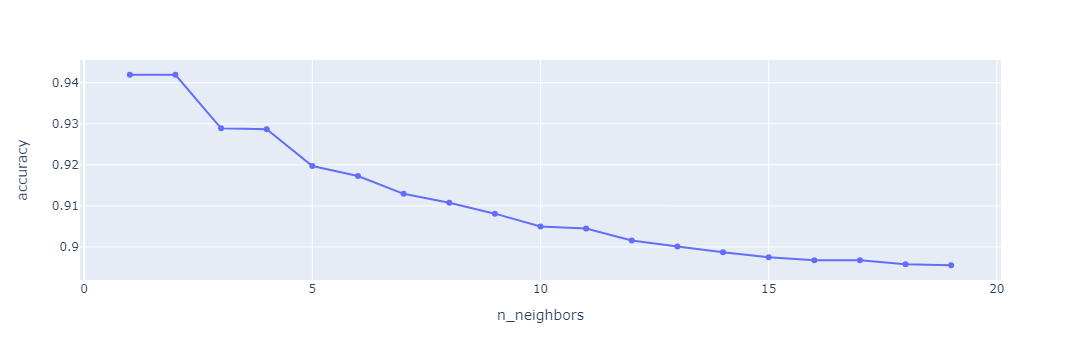

In [71]:
import plotly.express as px
results = pd.DataFrame(grid_search_knn.cv_results_)
subset = results[['param_n_neighbors', 'mean_test_score']]
fig = px.line(subset, x="param_n_neighbors", y="mean_test_score", markers=True)
fig.update_xaxes(title_text="n_neighbors")
fig.update_yaxes(title_text="accuracy")
fig.show()

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_dtc))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_dtc))
print("precision score:", precision_score(y_test, y_pred_dtc))
print("\n",classification_report(y_test, y_pred_dtc))

accuracy score: 0.9390715667311412
confusion matrix:
 [[885  18]
 [ 45  86]]
precision score: 0.8269230769230769

               precision    recall  f1-score   support

           0       0.95      0.98      0.97       903
           1       0.83      0.66      0.73       131

    accuracy                           0.94      1034
   macro avg       0.89      0.82      0.85      1034
weighted avg       0.94      0.94      0.94      1034



In [74]:
param_grid_dtc = {'max_depth': range(1,30,1)}
grid_search_dtc = GridSearchCV(dtc, param_grid_dtc, cv=5, scoring='accuracy')
grid_search_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': range(1, 30)}, scoring='accuracy')

In [75]:
grid_search_dtc.best_estimator_

DecisionTreeClassifier(max_depth=15)

In [76]:
import plotly.express as px
results = pd.DataFrame(grid_search_dtc.cv_results_)
subset = results[['param_max_depth', 'mean_test_score']]
fig = px.line(subset, x="param_max_depth", y="mean_test_score", markers=True)
fig.update_xaxes(title_text="max_depth")
fig.update_yaxes(title_text="accuracy")
fig.show()

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_rfc))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_rfc))
print("precision score:", precision_score(y_test, y_pred_rfc))
print("\n",classification_report(y_test, y_pred_rfc))

accuracy score: 0.9700193423597679
confusion matrix:
 [[899   4]
 [ 27 104]]
precision score: 0.9629629629629629

               precision    recall  f1-score   support

           0       0.97      1.00      0.98       903
           1       0.96      0.79      0.87       131

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [79]:
param_grid_rfc = {'n_estimators': range(10, 120, 10)}
grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring='accuracy')
grid_search_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=50),
             param_grid={'n_estimators': range(10, 120, 10)},
             scoring='accuracy')

In [80]:
grid_search_rfc.best_estimator_

RandomForestClassifier(n_estimators=110)

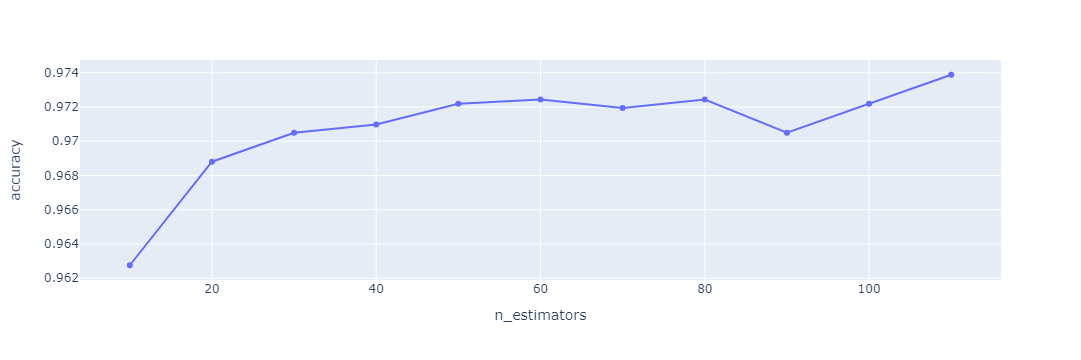

In [81]:
import plotly.express as px
results = pd.DataFrame(grid_search_rfc.cv_results_)
subset = results[['param_n_estimators', 'mean_test_score']]
fig = px.line(subset, x="param_n_estimators", y="mean_test_score", markers=True)
fig.update_xaxes(title_text="n_estimators")
fig.update_yaxes(title_text="accuracy")
fig.show()

In [82]:
from sklearn.svm import SVC

In [83]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_svc))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_svc))
print("precision score:", precision_score(y_test, y_pred_svc, zero_division=1))
print("\n",classification_report(y_test, y_pred_svc, zero_division=1))

accuracy score: 0.9796905222437138
confusion matrix:
 [[903   0]
 [ 21 110]]
precision score: 1.0

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       1.00      0.84      0.91       131

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [84]:
param_grid_svc = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [85]:
grid_search_svc.best_estimator_

SVC(kernel='sigmoid')

In [86]:
import plotly.express as px
results = pd.DataFrame(grid_search_svc.cv_results_)
subset = results[['param_kernel', 'mean_test_score']]
fig = px.line(subset, x="param_kernel", y="mean_test_score", markers=True)
fig.update_xaxes(title_text="param_kernel")
fig.update_yaxes(title_text="accuracy")
fig.show()

In [87]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [88]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_gnb))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_gnb))
print("precision score:", precision_score(y_test, y_pred_gnb))
print("\n",classification_report(y_test, y_pred_gnb))

accuracy score: 0.8617021276595744
confusion matrix:
 [[779 124]
 [ 19 112]]
precision score: 0.4745762711864407

               precision    recall  f1-score   support

           0       0.98      0.86      0.92       903
           1       0.47      0.85      0.61       131

    accuracy                           0.86      1034
   macro avg       0.73      0.86      0.76      1034
weighted avg       0.91      0.86      0.88      1034



In [89]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_mnb))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_mnb))
print("precision score:", precision_score(y_test, y_pred_mnb))
print("\n",classification_report(y_test, y_pred_mnb))

accuracy score: 0.9806576402321083
confusion matrix:
 [[896   7]
 [ 13 118]]
precision score: 0.944

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.94      0.90      0.92       131

    accuracy                           0.98      1034
   macro avg       0.96      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [90]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_bnb))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_bnb))
print("precision score:", precision_score(y_test, y_pred_bnb))
print("\n",classification_report(y_test, y_pred_bnb))

accuracy score: 0.9825918762088974
confusion matrix:
 [[902   1]
 [ 17 114]]
precision score: 0.991304347826087

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.99      0.87      0.93       131

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lg_model = LogisticRegression(max_iter=200)
lg_model.fit(X_train, y_train)
y_pred_lg = lg_model.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred_lg))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_lg))
print("precision score:", precision_score(y_test, y_pred_lg))
print("\n",classification_report(y_test, y_pred_lg))

accuracy score: 0.9738878143133463
confusion matrix:
 [[903   0]
 [ 27 104]]
precision score: 1.0

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       903
           1       1.00      0.79      0.89       131

    accuracy                           0.97      1034
   macro avg       0.99      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034

